# Zastosowanie modelu i wag do sieci

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import pylab
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from keras import backend as K
import os

def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("tensorflow")

#wczytujemy dane z modelu ANN
nazwa2 = 'porownanie1'
json_file = open(r'C:\Users\Lukasz K\Desktop\praca\model1/%s.json' %nazwa2, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

loaded_model.load_weights(r'C:\Users\Lukasz K\Desktop\praca\model1/%s.h5' %nazwa2)
print("Loaded ANN model from disk")

#wczytujemy dane z modelu ML
nazwa1 = 'porownanie2'
json_file = open(r'C:\Users\Lukasz K\Desktop\praca\model2/%s.json' %nazwa1, 'r')
loaded_model1_json = json_file.read()
json_file.close()
loaded_model1 = tf.keras.models.model_from_json(loaded_model1_json)

loaded_model1.load_weights(r'C:\Users\Lukasz K\Desktop\praca\model2/%s.h5' %nazwa1)
print("Loaded ANN model from disk")

Using TensorFlow backend.
D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tenso

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Loaded ANN model from disk
Loaded ANN model from disk


In [2]:
import json
from pprint import pprint

with open(r'C:\Users\Lukasz K\Desktop\praca\model1/%s.json' %nazwa2) as f:
    data = json.load(f)

pprint(data)

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'Dense',
                        'config': {'activation': 'relu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 6],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {'dtype': 'float32'}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_constraint': None,
                                   'kernel_initializer': {'class_name': 'GlorotUniform',
                                                          'config': {'dtype': 'float32',
                                                                     'seed': None}},
                                   'kern

In [3]:
import json
from pprint import pprint

with open(r'C:\Users\Lukasz K\Desktop\praca\model2/%s.json' %nazwa1) as f:
    data1 = json.load(f)

pprint(data1)

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'Dense',
                        'config': {'activation': 'relu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 6],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {'dtype': 'float32'}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_constraint': None,
                                   'kernel_initializer': {'class_name': 'GlorotUniform',
                                                          'config': {'dtype': 'float32',
                                                                     'seed': None}},
                                   'kern

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#zmiana csv!!! 
dane = pd.read_csv('daneT800-1500K.csv', sep = ";")
array = dane.values
x_data1 = dane.drop(['Cd'],axis=1)
y_val = dane[['Cd']].as_matrix()

scaler = MinMaxScaler()
scalerx = scaler.fit(x_data1)
x_data = scaler.transform(x_data1)

x_datas=pd.DataFrame(x_data, columns=['T','VF',  'Tr','l_tpb','E',  'i'])

X_train, X_test, y_train, y_test = train_test_split(x_datas,y_val,test_size=0.3,random_state=101)
X_test1 = X_test.as_matrix()
X_tst = scalerx.inverse_transform(X_test1)
X_tst = pd.DataFrame(X_tst)

x_data1

,T,VF,Tr,l_tpb,E,i
0,800,0.2,2,3,1.087036,0.00
1,800,0.2,2,3,1.087036,0.03
2,800,0.2,2,3,1.087036,0.06
3,800,0.2,2,3,1.087036,0.09
4,800,0.2,2,3,1.087036,0.12
...,...,...,...,...,...,...
77611,1400,0.8,25,8,0.059230,0.18
77612,1400,0.8,25,8,0.059230,0.21
77613,1400,0.8,25,8,0.059230,0.24
77614,1400,0.8,25,8,0.059230,0.27


In [5]:
optimizer = tf.train.RMSPropOptimizer(0.001)

loaded_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
                     
[loss, mae] = loaded_model.evaluate(X_test.values, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae ))

Testing set Mean Abs Error: 1800.47


In [6]:
test_predictions = loaded_model.predict(x_datas.values).flatten()
print(test_predictions)

[  -88.26993   -88.26993   -88.26993 ... 55073.67    61580.723
 69197.516  ]


In [7]:
optimizer = tf.train.RMSPropOptimizer(0.001)

loaded_model1.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
                     
[loss, mae] = loaded_model1.evaluate(X_test.values, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae ))

Testing set Mean Abs Error: 3165.93


In [8]:
test_predictions = loaded_model1.predict(x_datas.values).flatten()
print(test_predictions)

[1.3575919e+02 7.5562408e+01 4.6161285e+01 ... 8.9359164e+04 9.4629992e+04
 9.7310062e+04]


In [9]:
dane_pred = pd.DataFrame(test_predictions, columns=['pred'])
y_val = pd.DataFrame(y_val, columns = ['value'])
x_data = pd.DataFrame(x_data1, columns=['T','VF',  'Tr','l_tpb','E',  'i'])

porownanie = pd.concat([x_data, dane_pred, y_val, x_datas], axis =1)

porownanie.to_csv('porownanieread212.csv', sep=',')
porownanie

,T,VF,Tr,l_tpb,E,i,pred,value,T,VF,Tr,l_tpb,E,i
0,800,0.2,2,3,1.087036,0.00,135.759186,0.000000,0.0,0.0,0.0,0.0,0.493095,0.0
1,800,0.2,2,3,1.087036,0.03,75.562408,3.303537,0.0,0.0,0.0,0.0,0.493095,0.1
2,800,0.2,2,3,1.087036,0.06,46.161285,6.764090,0.0,0.0,0.0,0.0,0.493095,0.2
3,800,0.2,2,3,1.087036,0.09,48.908356,10.546135,0.0,0.0,0.0,0.0,0.493095,0.3
4,800,0.2,2,3,1.087036,0.12,103.312653,14.829433,0.0,0.0,0.0,0.0,0.493095,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77611,1400,0.8,25,8,0.059230,0.18,63384.332031,44593.396506,1.0,1.0,1.0,1.0,0.013810,0.6
77612,1400,0.8,25,8,0.059230,0.21,76583.773438,53723.476484,1.0,1.0,1.0,1.0,0.013810,0.7
77613,1400,0.8,25,8,0.059230,0.24,89359.164062,63685.123527,1.0,1.0,1.0,1.0,0.013810,0.8
77614,1400,0.8,25,8,0.059230,0.27,94629.992188,74632.530515,1.0,1.0,1.0,1.0,0.013810,0.9


In [10]:
def scaler (X, min, max):
    X1 = (X-min)/(max-min)
    return X1
def rescaler(X1, min, max):
    X = X1*(max-min)+min
    return X

In [11]:
class test():
    def pomiary(self):
        a = 3
        d = { "T" + str(i + 1) : self.kolejka(i) for i in range(int(a)) }

        keys = d.keys()
        sorted(keys)
        for x in keys:
            print (x, '=', d[x])

    def kolejka(self, i):
        
        return "scaler(T, x_datas['T'].min(), x_data['T'].max())"
test().pomiary()

T1 = scaler(T, x_datas['T'].min(), x_data['T'].max())
T2 = scaler(T, x_datas['T'].min(), x_data['T'].max())
T3 = scaler(T, x_datas['T'].min(), x_data['T'].max())


In [12]:
x_data1['T'].max()

1400

In [13]:
Dane_eksperymentalne_X_1273 = [57.6083,109.693,154.426,202.006,246.169,308.641]
Dane_eksperymentalne_Y_1273 = [0.014856,0.0226306,0.0301458,0.0349322,0.0394077,0.0460601]
Dane_eksperymentalne_X_1173 = [45.6925, 106.432, 147.833, 204.783, 252.943, 302.009]
Dane_eksperymentalne_Y_1173 = [0.0293997, 0.0404605, 0.0507099, 0.0618844, 0.0704109, 0.0797427]
Dane_eksperymentalne_X_1073 = [52.8008, 103.521, 148.03, 203.438, 250.446, 299.169]
Dane_eksperymentalne_Y_1073 = [0.0610294, 0.0825527, 0.0977485, 0.114673, 0.130445, 0.141099]

In [14]:
global ANN
global SSN
SSN = ''
ANN = ''
nazwa = ''

def plot (T,VF, l, tortuosity,
         T1, VF1, l1, tortuosity1,
         T2, VF2, l2, tortuosity2
         ,model):
      
    F = 96485
    R = 8.3145
                
    p_h2 = 97000
    p_h2o = 3000
                                    
    L = 0.00005
    alpha = 0.5
    l_tpb = l*10**12
    l_tpb1 = l1*10**12
    l_tpb2 = l2*10**12
                
#operacje matematyczne
    b = R*T/(F*alpha)
    
    i0_an = 31.4*l_tpb*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T*R))
    sigma_ion = 3.4*10000*np.exp(-10350/T)
    sigma_ion_eff = sigma_ion*VF/tortuosity    
    
    epsilon2 = (sigma_ion_eff*b)/(2*i0_an*L**2)
    epsilon = np.sqrt(epsilon2)
    
    b1 = R*T1/(F*alpha)
    
    i0_an1 = 31.4*l_tpb1*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T1*R))
    sigma_ion1 = 3.4*10000*np.exp(-10350/T1)
    sigma_ion_eff1 = sigma_ion1*VF1/tortuosity1
        
    epsilon21 = (sigma_ion_eff1*b1)/(2*i0_an1*L**2)
    epsilon1 = np.sqrt(epsilon21)
    
    b2 = R*T2/(F*alpha)
    
    i0_an2 = 31.4*l_tpb2*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T2*R))
    sigma_ion2 = 3.4*10000*np.exp(-10350/T2)
    sigma_ion_eff2 = sigma_ion2*VF2/tortuosity2
        
    epsilon22 = (sigma_ion_eff2*b2)/(2*i0_an2*L**2)
    epsilon2 = np.sqrt(epsilon22)

    #dane eksperymentalne umieszczone na wykresie
    Dane_eksperymentalne_X_1173 = [45.6925, 106.432, 147.833, 204.783, 252.943, 302.009]
    Dane_eksperymentalne_Y_1173 = [0.0293997, 0.0404605, 0.0507099, 0.0618844, 0.0704109, 0.0797427]
    Dane_eksperymentalne_X_1073 = [52.8008, 103.521, 148.03, 203.438, 250.446, 299.169]
    Dane_eksperymentalne_Y_1073 = [0.0610294, 0.0825527, 0.0977485, 0.114673, 0.130445, 0.141099]
    Dane_eksperymentalne_X_1273 = [57.6083,109.693,154.426,202.006,246.169,308.641]
    Dane_eksperymentalne_Y_1273 = [0.014856,0.0226306,0.0301458,0.0349322,0.0394077,0.0460601]
                            
    x = np.array ([0.00, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3])
        
    Ts = scaler(T, x_data1['T'].min(), x_data1['T'].max())
    epsilons = scaler(epsilon, x_data1['E'].min(), x_data1['E'].max())
    ls = scaler(l, x_data1['l_tpb'].min(), x_data1['l_tpb'].max())
    tortuositys = scaler(tortuosity, x_data1['Tr'].min(), x_data1['Tr'].max())
    VFs = scaler(VF, x_data1['VF'].min(), x_data1['VF'].max())
    Ts1 = scaler(T1, x_data1['T'].min(), x_data1['T'].max())
    epsilons1 = scaler(epsilon1, x_data1['E'].min(), x_data1['E'].max())
    ls1 = scaler(l1, x_data1['l_tpb'].min(), x_data1['l_tpb'].max())
    tortuositys1 = scaler(tortuosity1, x_data1['Tr'].min(), x_data1['Tr'].max())
    VFs1 = scaler(VF1, x_data1['VF'].min(), x_data1['VF'].max())
    Ts2 = scaler(T2, x_data1['T'].min(), x_data1['T'].max())
    epsilons2 = scaler(epsilon2, x_data1['E'].min(), x_data1['E'].max())
    ls2 = scaler(l2, x_data1['l_tpb'].min(), x_data1['l_tpb'].max())
    tortuositys2 = scaler(tortuosity2, x_data1['Tr'].min(), x_data1['Tr'].max())
    VFs2 = scaler(VF2, x_data1['VF'].min(), x_data1['VF'].max())
    iS = scaler(x, 0, 0.3)
   
    xnew = np.linspace(0.0, 0.3, 50)
    
    data = {'T': np.repeat(T, len(x)), 
            'VF':np.repeat(VF, len(x)),
            'Tr' : np.repeat(tortuosity, len(x)),
            'l_tpb' : np.repeat(l,len(x)),
            'E': np.repeat(epsilon, len(x)), 
            
            'i' :  iS,
            }
        
    datas = {'T': np.repeat(Ts, len(x)), 
            'VF':np.repeat(VFs, len(x)),
            'Tr' : np.repeat(tortuositys, len(x)),
            'l_tpb' : np.repeat(ls,len(x)),
            'E': np.repeat(epsilons, len(x)), 
            
            'i' : iS,
            }
    datas1 = {'T': np.repeat(Ts1, len(x)), 
            'VF':np.repeat(VFs1, len(x)),
            'Tr' : np.repeat(tortuositys1, len(x)),
            'l_tpb' : np.repeat(ls1,len(x)),
            'E': np.repeat(epsilons1, len(x)), 
            
            'i' : iS,
            }
        
    datas2 = {'T': np.repeat(Ts2, len(x)), 
            'VF':np.repeat(VFs2, len(x)),
            'Tr' : np.repeat(tortuositys2, len(x)),
            'l_tpb' : np.repeat(ls2, len(x)),
            'E': np.repeat(epsilons2, len(x)), 
            
            'i' : iS,
            }   
    
    x_data = pd.DataFrame(data = data, columns=['T','VF','Tr','l_tpb','E', 'i'])
   
    x_datas = pd.DataFrame(data = datas, columns=['T','VF','Tr','l_tpb','E', 'i'])
    
    x_datas1 = pd.DataFrame(data = datas1, columns=['T','VF','Tr','l_tpb','E', 'i'])
    
    x_datas2 = pd.DataFrame(data = datas2, columns=['T','VF','Tr','l_tpb','E', 'i'])
                
    if model == 'ANN':
        
    
        pred11 = loaded_model.predict(x_datas.values).flatten()
        pred1 = pred11/10
        pred22 = loaded_model.predict(x_datas1.values).flatten()
        pred2 = pred22/10
        pred33 = loaded_model.predict(x_datas2.values).flatten()
        pred3 = pred33/10
        pred1[0]=0
        pred2[0]=0
        pred3[0]=0
        coto = 'ANN'
        nazwa = nazwa1
        
    else:
        
        pred11 = loaded_model1.predict(x_datas.values).flatten()
        pred1 = pred11/10
        pred22 = loaded_model1.predict(x_datas1.values).flatten()
        pred2 = pred22/10
        pred33 = loaded_model1.predict(x_datas2.values).flatten()
        pred3 = pred33/10
        pred1[0]=0
        pred2[0]=0
        pred3[0]=0
        coto = 'SNN'
        nazwa = nazwa2
            
    array = x_data.values
    X = array[:,4]
    
    etab = x/b
    etab1 = x/b1
    etab2 = x/b2
    
    y11 = (sigma_ion_eff/L)*b*1/epsilon*np.sinh(etab)*(np.sinh(1/epsilon)/np.cosh(1/epsilon))
    y1 = y11/10
    y22 = (sigma_ion_eff1/L)*b1*1/epsilon1*np.sinh(etab1)*(np.sinh(1/epsilon1)/np.cosh(1/epsilon1))
    y2 = y22/10
    y33 = (sigma_ion_eff2/L)*b2*1/epsilon2*np.sinh(etab2)*(np.sinh(1/epsilon2)/np.cosh(1/epsilon2))
    y3 = y33/10
        
    z1 = np.polyfit(x, pred1, 2)
    p1 = np.poly1d(z1)
    p1[0]=0
    z2 = np.polyfit(x, pred2, 1)
    p2 = np.poly1d(z2)
    p2[0]=0
    z3 = np.polyfit(x, pred3, 1)
    p3 = np.poly1d(z3)
    p3[0]=0
    xnew1 = np.linspace(0, Dane_eksperymentalne_Y_1073[5]+0.1515, 50)
    xnew2 = np.linspace(0, Dane_eksperymentalne_Y_1173[5]+0.035, 50)
    xnew3 = np.linspace(0, Dane_eksperymentalne_Y_1273[5]+0.004, 50)
        
    epsilon = round(epsilon, 4)
    epsilon1 = round(epsilon1, 4)
    epsilon2 = round(epsilon2, 4)

    plt.style.use('classic')
    plt.figure(figsize=(12,6), facecolor='white')
    plt.xlabel(r'Gęstość prądu $\mathregular{({mA}\ {cm^{-2}})}$', size = 16)
    plt.ylabel('Nadpotencjał (V)', size = 16)  
    plt.plot(p1(xnew1), xnew1,'b' , label = 'ANN 1073K' )
    plt.plot(p2(xnew2), xnew2,'r', label = 'ANN 1173K' )
    plt.plot(p3(xnew3), xnew3,'k' , label = 'ANN 1273K' )
    plt.plot(y1, x, 'b--', label='Benchmark T= %s K' %(T))
    plt.plot(y2, x, 'r--' , label='Benchmark T= %s K' %(T1))
    plt.plot(y3, x, 'k--' , label='Benchmark T= %s K' %(T2))
    plt.plot(Dane_eksperymentalne_X_1073, Dane_eksperymentalne_Y_1073, 'b^',
            label = '1073K exp')
    plt.plot(Dane_eksperymentalne_X_1173, Dane_eksperymentalne_Y_1173, 'r.',
            label = '1173K exp')
    plt.plot(Dane_eksperymentalne_X_1273, Dane_eksperymentalne_Y_1273,'ks', label = '1273K exp')
    
    plt.legend(['SSN $\mathit{T}$ = 800 $\mathregular{^{\circ}C}$', 'SSN $\mathit{T}$ = 900 $\mathregular{^{\circ}C}$', 'SSN $\mathit{T}$ = 1000 $\mathregular{^{\circ}C}$',
                'REF $\mathit{T}$ = 800 $\mathregular{^{\circ}C}$', 'REF $\mathit{T}$ = 900 $\mathregular{^{\circ}C}$', 'REF $\mathit{T}$ = 1000 $\mathregular{^{\circ}C}$',
                'EXP $\mathit{T}$ = 800 $\mathregular{^{\circ}C}$', 'EXP $\mathit{T}$ = 900 $\mathregular{^{\circ}C}$', 'EXP $\mathit{T}$ = 1000 $\mathregular{^{\circ}C}$'], 
               loc='best', numpoints = 1, ncol = 3, frameon= False)
    
    plt.savefig('wyniki_ANN_benchmark.png', dpi= 400)
    print('T= %s, l_tpb= %s, τ  = %s, ε= %s, model = %s'%(T, l, tortuosity, epsilon2, coto))
    plt.axis([-50, 350, 0, 0.4])
    plt.grid(True)
    plt.savefig(r'C:\Users\Lukasz K\Desktop\Praca\\wykresy/porownanie_%s_Kishimoto(%s).png' % (coto, nazwa), dpi= 400)
    plt.show()

T= 1073, l_tpb= 2.5, τ  = 8.25, ε= 0.1305, model = ANN


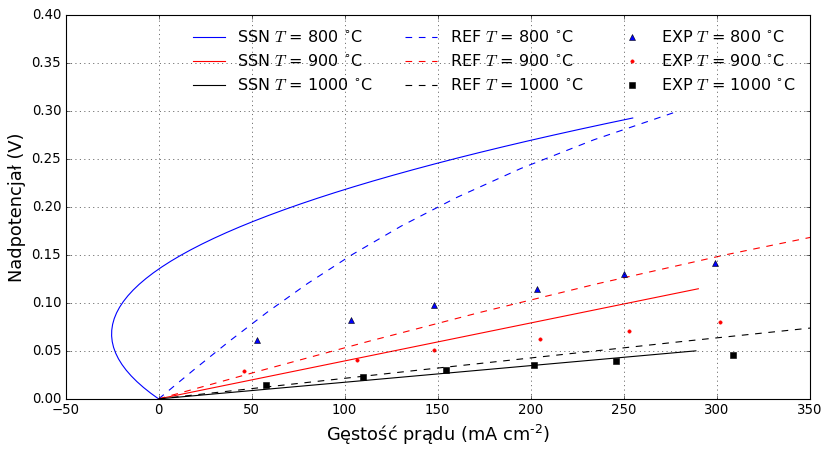

In [15]:
    plot (1073, 0.25, 2.5, 8.25,
     1173, 0.25, 2.5, 8.25,
     1273, 0.25, 2.5, 8.25
     ,'ANN')

T= 1073, l_tpb= 2.5, τ  = 8.25, ε= 0.1305, model = SNN


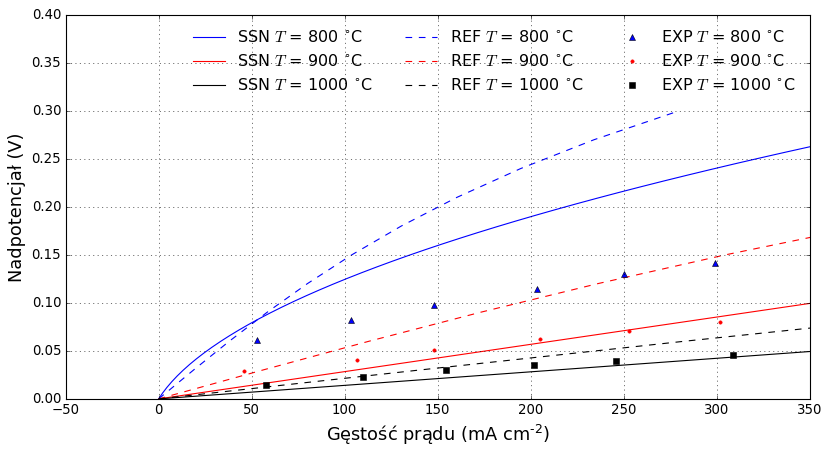

In [16]:
    plot (1073, 0.25, 2.5, 8.25,
     1173, 0.25, 2.5, 8.25,
     1273, 0.25, 2.5, 8.25
     ,'SSN')

In [17]:
    x = '$b = R*T/(F*alpha)$'
    
    y = '$i0_an = 31.4*l_tpb*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T*R))$'
    z = '$sigma_ion = 3.4*10000*np.exp(-10350/T)$'
    a = '$sigma_ion_eff = sigma_ion*VF/tortuosity$'   
    
    q = '$epsilon2 = (sigma_ion_eff*b)/(2*i0_an*L**2)$'
    w = '$epsilon = np.sqrt(epsilon2)$'
    x

'$b = R*T/(F*alpha)$'

<Figure size 640x480 with 0 Axes>

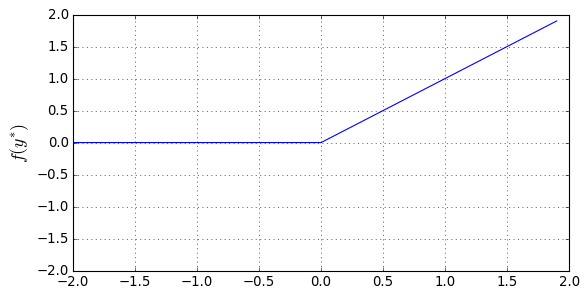

In [18]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-2, 2, .1)
zero = np.zeros(len(z))
y = np.max([zero, z], axis=0)

fig = plt.figure()
plt.style.use('classic')
plt.figure(figsize=(8,4), facecolor='white')
plt.ylabel('$\t{f({y^{*}})}$', size = 16)
plt.plot(z, y)
plt.axis([-2, 2, -2, 2])
plt.grid(True)
plt.savefig(r'C:\Users\\Lukasz K\\Desktop\\Inzynierka\\Literatura\\INZYNIERKA\\relu.png', dpi= 400)
plt.show()